In [20]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

### Load Dataset

In [22]:
df = pd.read_csv('/home/amardip/Desktop/Boston.csv')
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,NaN,NaN
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0,NaN,NaN
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,0,NaN,NaN
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,0,NaN,NaN
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,0,NaN,NaN
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,0,NaN,NaN


In [23]:
df.drop(columns=['Unnamed: 15','Unnamed: 16'],inplace=True)

In [24]:
df.drop(columns=['CAT. MEDV'],inplace=True)

#### Checking for null values

In [25]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [27]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Checking correlation with target variable MEDV

In [28]:
df.corr()['MEDV'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

In [29]:
X = df.loc[:,['LSTAT','PTRATIO','RM']]
Y = df.loc[:,"MEDV"]
X.shape,Y.shape

((506, 3), (506,))

### Preparing training and testing data set

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=10)

### Normalizing training and testing dataset

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
scaler.fit(x_train)

StandardScaler()

In [34]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Preparing model

In [39]:
from keras.models import Sequential
from keras.layers import Dense

In [40]:
model = Sequential()

In [41]:
model.add(Dense(128,input_shape=(3,),activation='relu',name='input'))
model.add(Dense(64,activation='relu',name='layer_1'))
model.add(Dense(1,activation='linear',name='output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               512       
                                                                 
 layer_1 (Dense)             (None, 64)                8256      
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(x_train,y_train,epochs=100,validation_split=0.05)

Epoch 1/100
12/12 [==============================] - 1s 12ms/step - loss: 527.9463 - mae: 21.3434 - val_loss: 696.0701 - val_mae: 23.6465
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 487.1362 - mae: 20.4085 - val_loss: 646.9800 - val_mae: 22.5284
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 436.5184 - mae: 19.1635 - val_loss: 580.4915 - val_mae: 20.9406
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 366.2299 - mae: 17.3224 - val_loss: 491.6040 - val_mae: 18.8557
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 275.1522 - mae: 14.8295 - val_loss: 386.9529 - val_mae: 16.2835
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 176.7201 - mae: 11.7614 - val_loss: 280.9530 - val_mae: 13.1702
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 94.5197 - mae: 8.4971 - val_loss: 195.9897 - val_mae: 10.6745
Epoch 8/100
12/12 [=======================

Epoch 62/100
12/12 [==============================] - 0s 3ms/step - loss: 13.2686 - mae: 2.6259 - val_loss: 80.5268 - val_mae: 5.4590
Epoch 63/100
12/12 [==============================] - 0s 3ms/step - loss: 13.2043 - mae: 2.6018 - val_loss: 81.0511 - val_mae: 5.4224
Epoch 64/100
12/12 [==============================] - 0s 3ms/step - loss: 13.2444 - mae: 2.6139 - val_loss: 82.8336 - val_mae: 5.4711
Epoch 65/100
12/12 [==============================] - 0s 3ms/step - loss: 12.9948 - mae: 2.5914 - val_loss: 80.1579 - val_mae: 5.3950
Epoch 66/100
12/12 [==============================] - 0s 2ms/step - loss: 13.0063 - mae: 2.5915 - val_loss: 84.9741 - val_mae: 5.5725
Epoch 67/100
12/12 [==============================] - 0s 2ms/step - loss: 12.7984 - mae: 2.6015 - val_loss: 81.0457 - val_mae: 5.4683
Epoch 68/100
12/12 [==============================] - 0s 2ms/step - loss: 12.8066 - mae: 2.6023 - val_loss: 81.1617 - val_mae: 5.4349
Epoch 69/100
12/12 [==============================] - 0s 3ms/s

In [43]:
output = model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 1ms/step - loss: 22.7018 - mae: 3.1161


In [44]:
print(f"Mean Squared Error: {output[0]}"
      ,f"Mean Absolute Error: {output[1]}",sep="\n")

Mean Squared Error: 22.70177459716797
Mean Absolute Error: 3.1161367893218994


In [45]:
y_pred = model.predict(x=x_test)

4/4 [==============================] - 0s 3ms/step


In [46]:
print(*zip(y_pred,y_test))

(array([25.326637], dtype=float32), 28.4) (array([30.812267], dtype=float32), 31.1) (array([26.25681], dtype=float32), 23.5) (array([28.208357], dtype=float32), 26.6) (array([19.116707], dtype=float32), 19.6) (array([16.953617], dtype=float32), 14.3) (array([42.137882], dtype=float32), 50.0) (array([14.562979], dtype=float32), 14.3) (array([19.744122], dtype=float32), 20.7) (array([43.466663], dtype=float32), 37.6) (array([17.756025], dtype=float32), 20.4) (array([27.114046], dtype=float32), 27.5) (array([22.5065], dtype=float32), 36.2) (array([32.867413], dtype=float32), 32.0) (array([31.563795], dtype=float32), 33.1) (array([52.6807], dtype=float32), 48.8) (array([25.997906], dtype=float32), 24.6) (array([19.153355], dtype=float32), 26.4) (array([21.27835], dtype=float32), 23.2) (array([20.296463], dtype=float32), 17.0) (array([33.501163], dtype=float32), 41.3) (array([15.604509], dtype=float32), 14.9) (array([22.470581], dtype=float32), 18.5) (array([24.985226], dtype=float32), 25.0

4/4 [==============================] - 0s 1ms/step


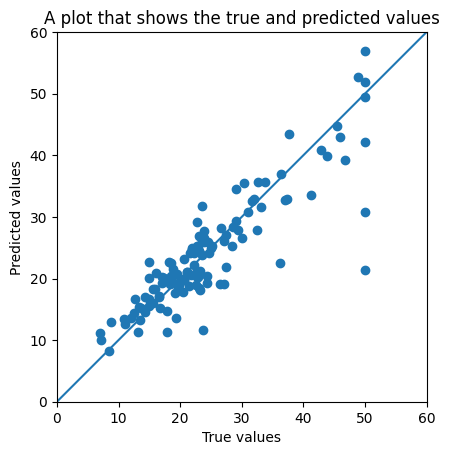

In [47]:
y_pred = model.predict(x_test).flatten()
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('A plot that shows the true and predicted values')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.plot([0, 60], [0, 60])